In [299]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as st

In [300]:
df = pd.read_csv('gas_sales_data.csv')[["Temperature", "Sum"]]
df.describe()

,Temperature,Sum
count,252.000000,2.520000e+02
mean,13.367381,1.666574e+06
std,9.540984,7.965762e+05
min,-5.740000,4.513220e+05
25%,4.657500,1.094284e+06
50%,14.315000,1.436072e+06
75%,22.260000,2.226306e+06
max,28.560000,3.748910e+06


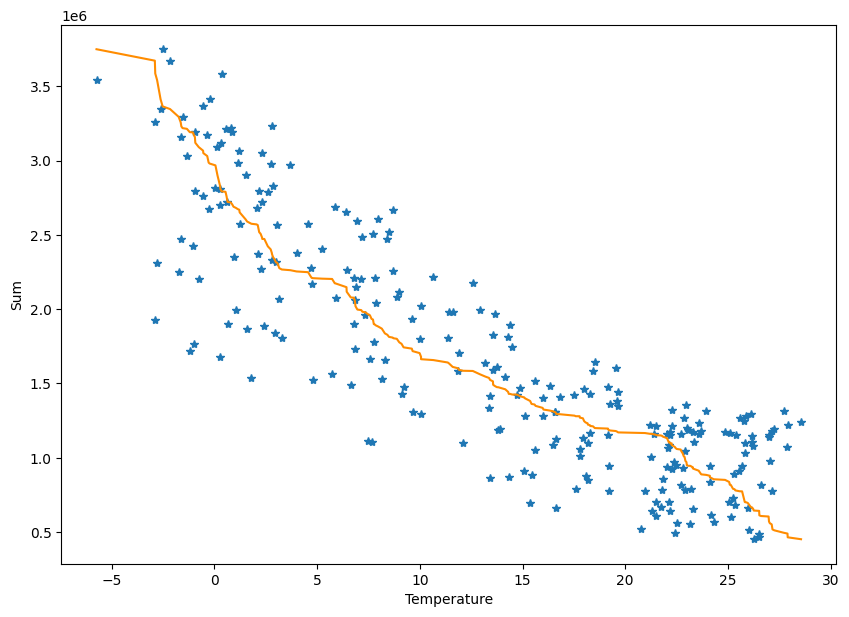

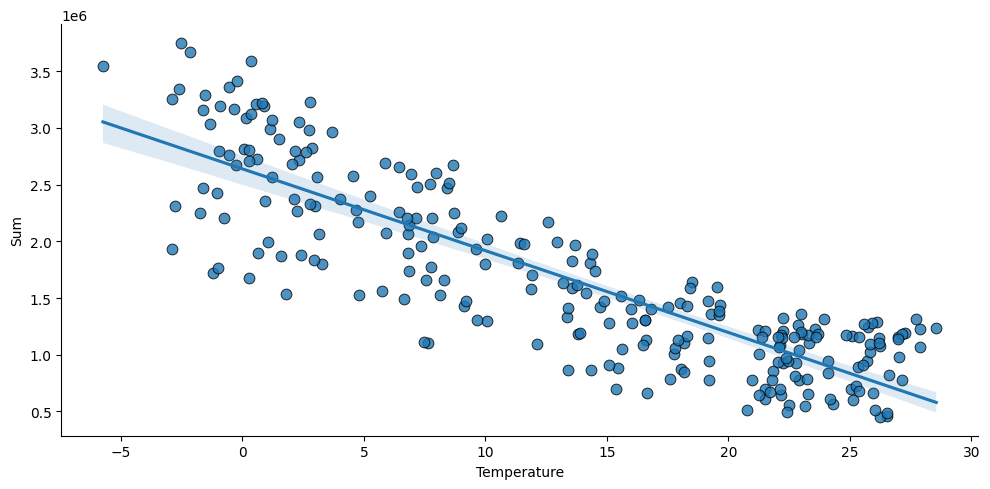

In [301]:
plt.figure(figsize=(10, 7))
plt.plot(df["Temperature"], df["Sum"], "*", )
plt.xlabel("Temperature")
plt.ylabel("Sum")
n_T = sorted(df["Temperature"])
n_S = sorted(df["Sum"], reverse=True)
plt.plot(n_T, n_S, "-", color="darkorange")
plt.show()
sns.lmplot(x="Temperature", y="Sum", data=df,
           height=5, aspect=2, robust=True, palette='tab10',
           scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.show()

In [302]:
model = LinearRegression()
X = df[["Sum"]]
y = df["Temperature"]

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((176, 1), (176,), (76, 1), (76,))

In [304]:
model.fit(X_train, y_train)
(model.coef_, model.intercept_)

(array([-1.034534e-05]), 30.383285164813962)

In [305]:
model.score(X_test, y_test)

0.7774558547444101

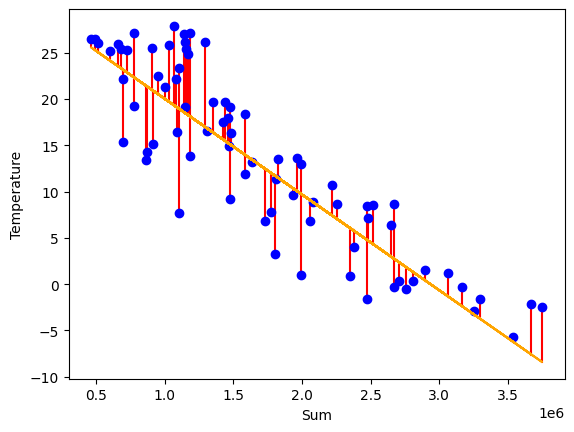

In [306]:
y_pred = model.predict(X_test)

# for x in zip(X_test["Sum"], y_test, X_test["Sum"], y_pred):
#     plt.plot([x[0], x[2]], [x[1], x[3]], "r-")
# plt.plot(X_test["Sum"], y_pred, '-', color="orange")
# plt.plot(X_test, y_test, "bo")
# plt.ylabel("Temperature")
# plt.xlabel("Sum")
# plt.show()

# Plot the lines using NumPy array operations
plt.plot([X_test["Sum"], X_test["Sum"]], [y_test, y_pred], "r-")
plt.plot(X_test, y_test, "bo")
plt.plot(X_test, y_pred, '-', color="orange")
plt.ylabel("Temperature")
plt.xlabel("Sum")
plt.show()



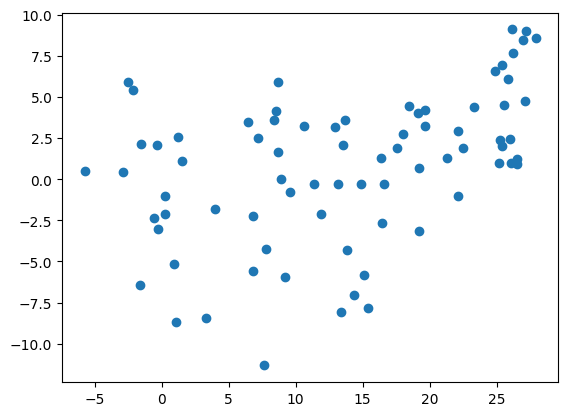

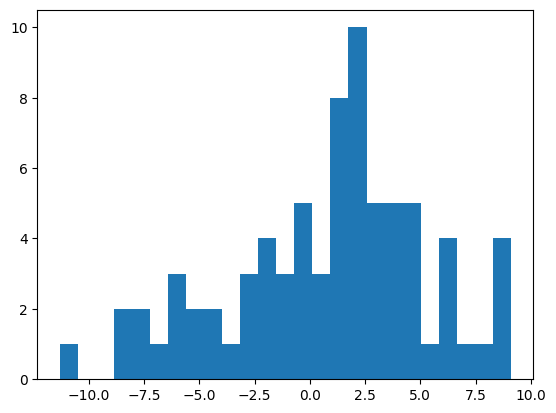

In [307]:
x = (y_test - y_pred)
plt.scatter(y_test, x)
plt.show()
plt.hist(x, bins=25)
plt.show()